# Assignment 1
## Data Cleaning

In [3]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [4]:
#load file
data = pd.read_csv('raw_house_data.csv')

In [5]:
#view the headersl size from data and some patterns
headers = data.columns
print(headers)
print(data.shape)
print(data.head(5))

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')
(5000, 16)
        MLS  sold_price  zipcode     longitude    latitude  lot_acres  \
0  21530491   5300000.0    85637    -1.103.782  31.356.362    2154.00   
1  21529082   4200000.0    85646  -111.045.371  31.594.213    1707.00   
2   3054672   4200000.0    85646  -111.040.707  31.594.844    1707.00   
3  21919321   4500000.0    85646  -111.035.925  31.645.878     636.67   
4  21306357   3411450.0    85750  -110.813.768  32.285.162       3.21   

      taxes  year_built  bedrooms bathrooms sqrt_ft garage  \
0   5272.00        1941        13        10   10500      0   
1  10422.36        1997         2         2    7300      0   
2  10482.00        1997         2         3    None   None   
3   8418.58        1930         7         5    9019      4  

In [6]:
#count the number of unique values of the data
print(data.nunique())

MLS                 5000
sold_price          1092
zipcode               56
longitude           4762
latitude            4821
lot_acres            645
taxes               4719
year_built           112
bedrooms              15
bathrooms             20
sqrt_ft             2362
garage                22
kitchen_features    1872
fireplaces            10
floor_covering       311
HOA                  378
dtype: int64


In [7]:
#drop duplicates if exists
data = data.drop_duplicates()
#remove ids (MLS) from each pattern
#due to that feature has a big entropy, doesn't have to much info about the pattern
#Thus, the lower the entropy of a feature, the more significant that feature will be.
data = data.drop('MLS', axis = 1)

In [8]:
#view data types
print(data.dtypes)

sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object


In [9]:
#view if the data has missing values, equal to null, or string none
print(data.isnull().sum())
print((data=="None").sum())

sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64
sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres             0
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces            0
floor_covering        1
HOA                 562
dtype: int64


In [10]:
#replace string none with nan (none) values, and then view
data = data.replace([None,'None'], np.nan)
print(data.isnull().sum())

sold_price            0
zipcode               0
longitude             0
latitude              0
lot_acres            10
taxes                 0
year_built            0
bedrooms              0
bathrooms             6
sqrt_ft              56
garage                7
kitchen_features     33
fireplaces           25
floor_covering        1
HOA                 562
dtype: int64


In [11]:
#convert the features a numeric if is posible, just for the numeric features
cols_nums = ['lot_acres','sqrt_ft','HOA']
data[cols_nums] = data[cols_nums].apply(pd.to_numeric, errors='coerce', axis=1)

In [12]:
#numeric values use mean, to categorical values use mode (most often value)
for i in cols_nums:
    data[i].fillna(data[i].mean(), inplace=True)
#categorical values use mode
print(data.isnull().sum())

sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres            0
taxes                0
year_built           0
bedrooms             0
bathrooms            6
sqrt_ft              0
garage               7
kitchen_features    33
fireplaces          25
floor_covering       1
HOA                  0
dtype: int64


In [13]:
#imputate cat values with the mode
cols_cat = ['kitchen_features','floor_covering','bathrooms','garage','fireplaces']
for i in cols_cat:
    data[i].fillna(data[i].mode()[0], inplace=True)

In [14]:
#view if does work
print(data.isnull().sum())

sold_price          0
zipcode             0
longitude           0
latitude            0
lot_acres           0
taxes               0
year_built          0
bedrooms            0
bathrooms           0
sqrt_ft             0
garage              0
kitchen_features    0
fireplaces          0
floor_covering      0
HOA                 0
dtype: int64


### Pre-processing of the features with natural language
[kitchen_features, floor_covering]

These features have been input by humans, therefore they could be treated as natural language data

<AxesSubplot:xlabel='0'>

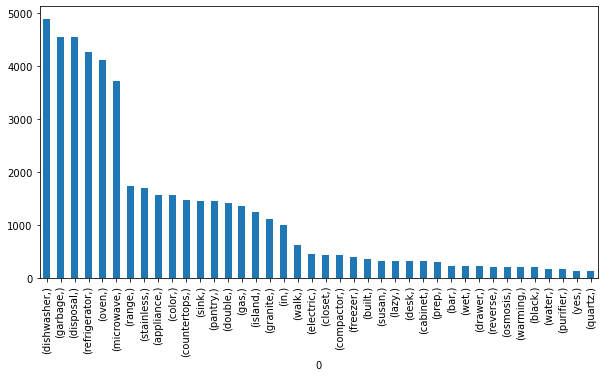

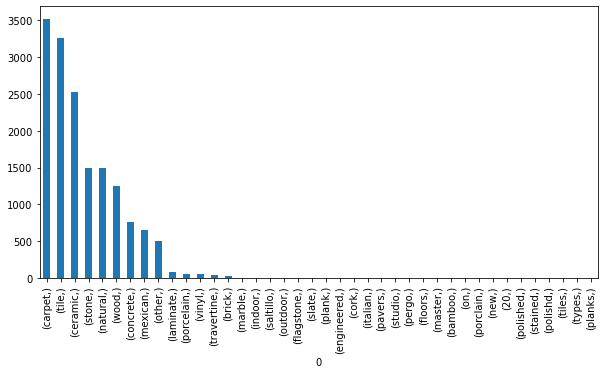

In [18]:
list_cat_feature1 = data.kitchen_features.str.split(',').astype(str).tolist()
list_cat_feature2 = data.floor_covering.str.split(',').astype(str).tolist()
all_tokens_1 = []
all_tokens_2 = []
for i, text in enumerate(list_cat_feature1):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    all_tokens_1.append(tokenizer.tokenize(text.lower()))
for i, text in enumerate(list_cat_feature2):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    all_tokens_2.append(tokenizer.tokenize(text.lower()))

#feature kitchen_features
plt.figure(figsize=(10,5))
result_1 = pd.DataFrame(sum(all_tokens_1, []))
result_1.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))

#feature floor_covering
plt.figure(figsize=(10,5))
result_2 = pd.DataFrame(sum(all_tokens_2, []))
result_2.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))

### As future work, it could be applied to use a Bag Of Words or TF-IDF to extract the numeric features from the text and use them in some models as an input.

## EDA

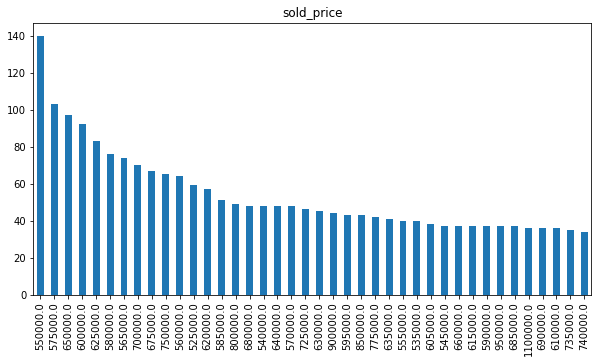

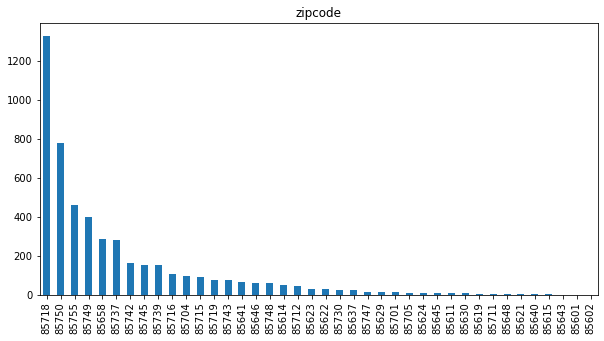

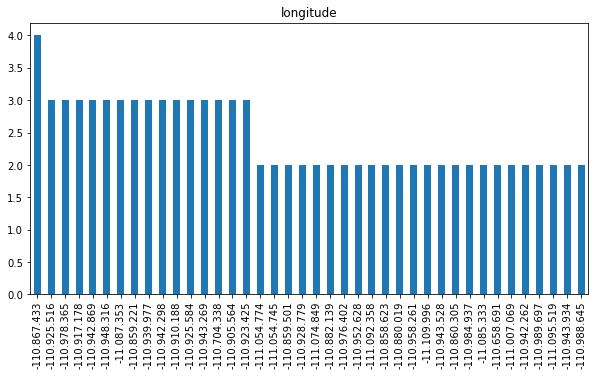

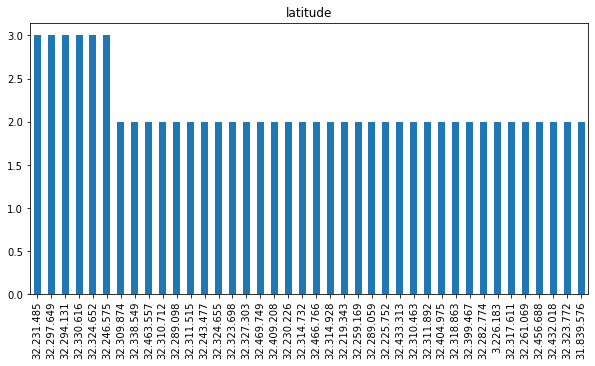

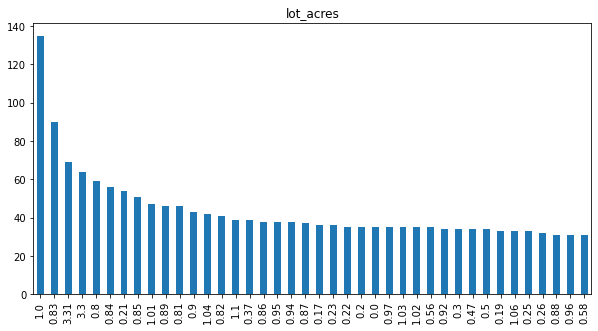

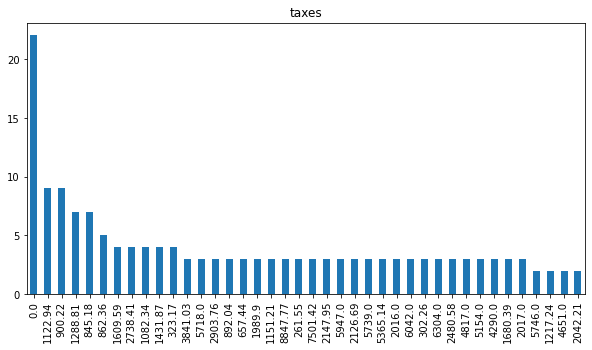

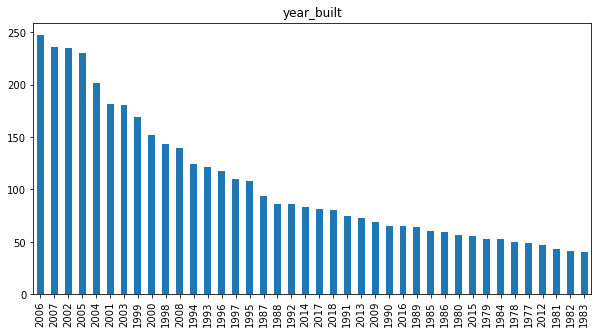

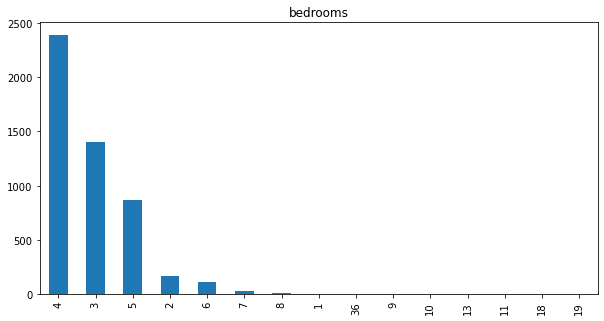

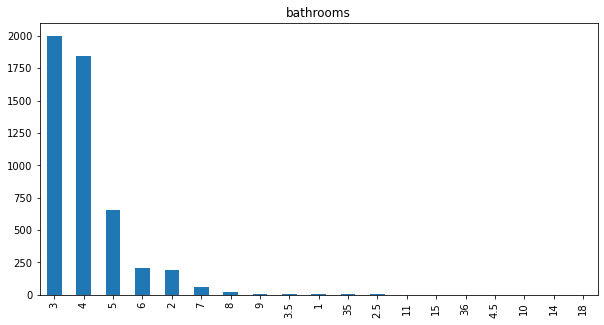

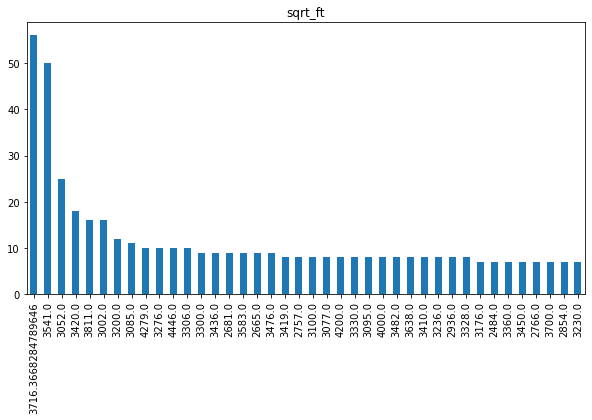

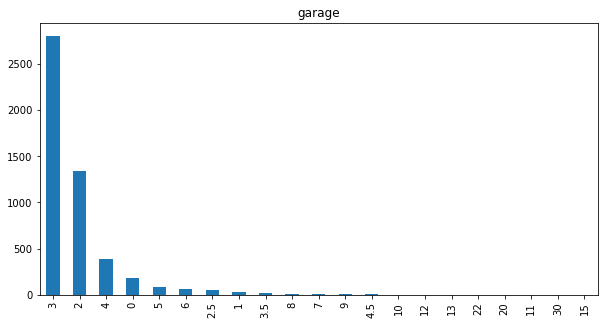

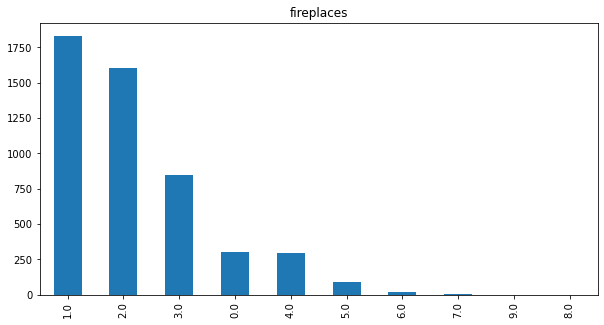

In [65]:
#grahps to see what the data tell us about often 
#houses build by year, see that from 2006 to 2001 a lot of houses were built
cols_view = ['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces']
for i in range(len(cols_view)):
    plt.figure(figsize=(10,5))
    data[cols_view[i]].value_counts().nlargest(40).plot(kind='bar')
    plt.title(cols_view[i])


<AxesSubplot:>

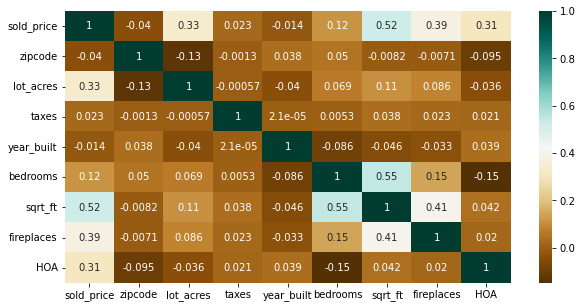

In [66]:
#more graphs to see more info, 
#to understand the correlation between features
#they can be used to visualize the correlation among them
#we can see that we can use some features to make a predictions
plt.figure(figsize=(10,5))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

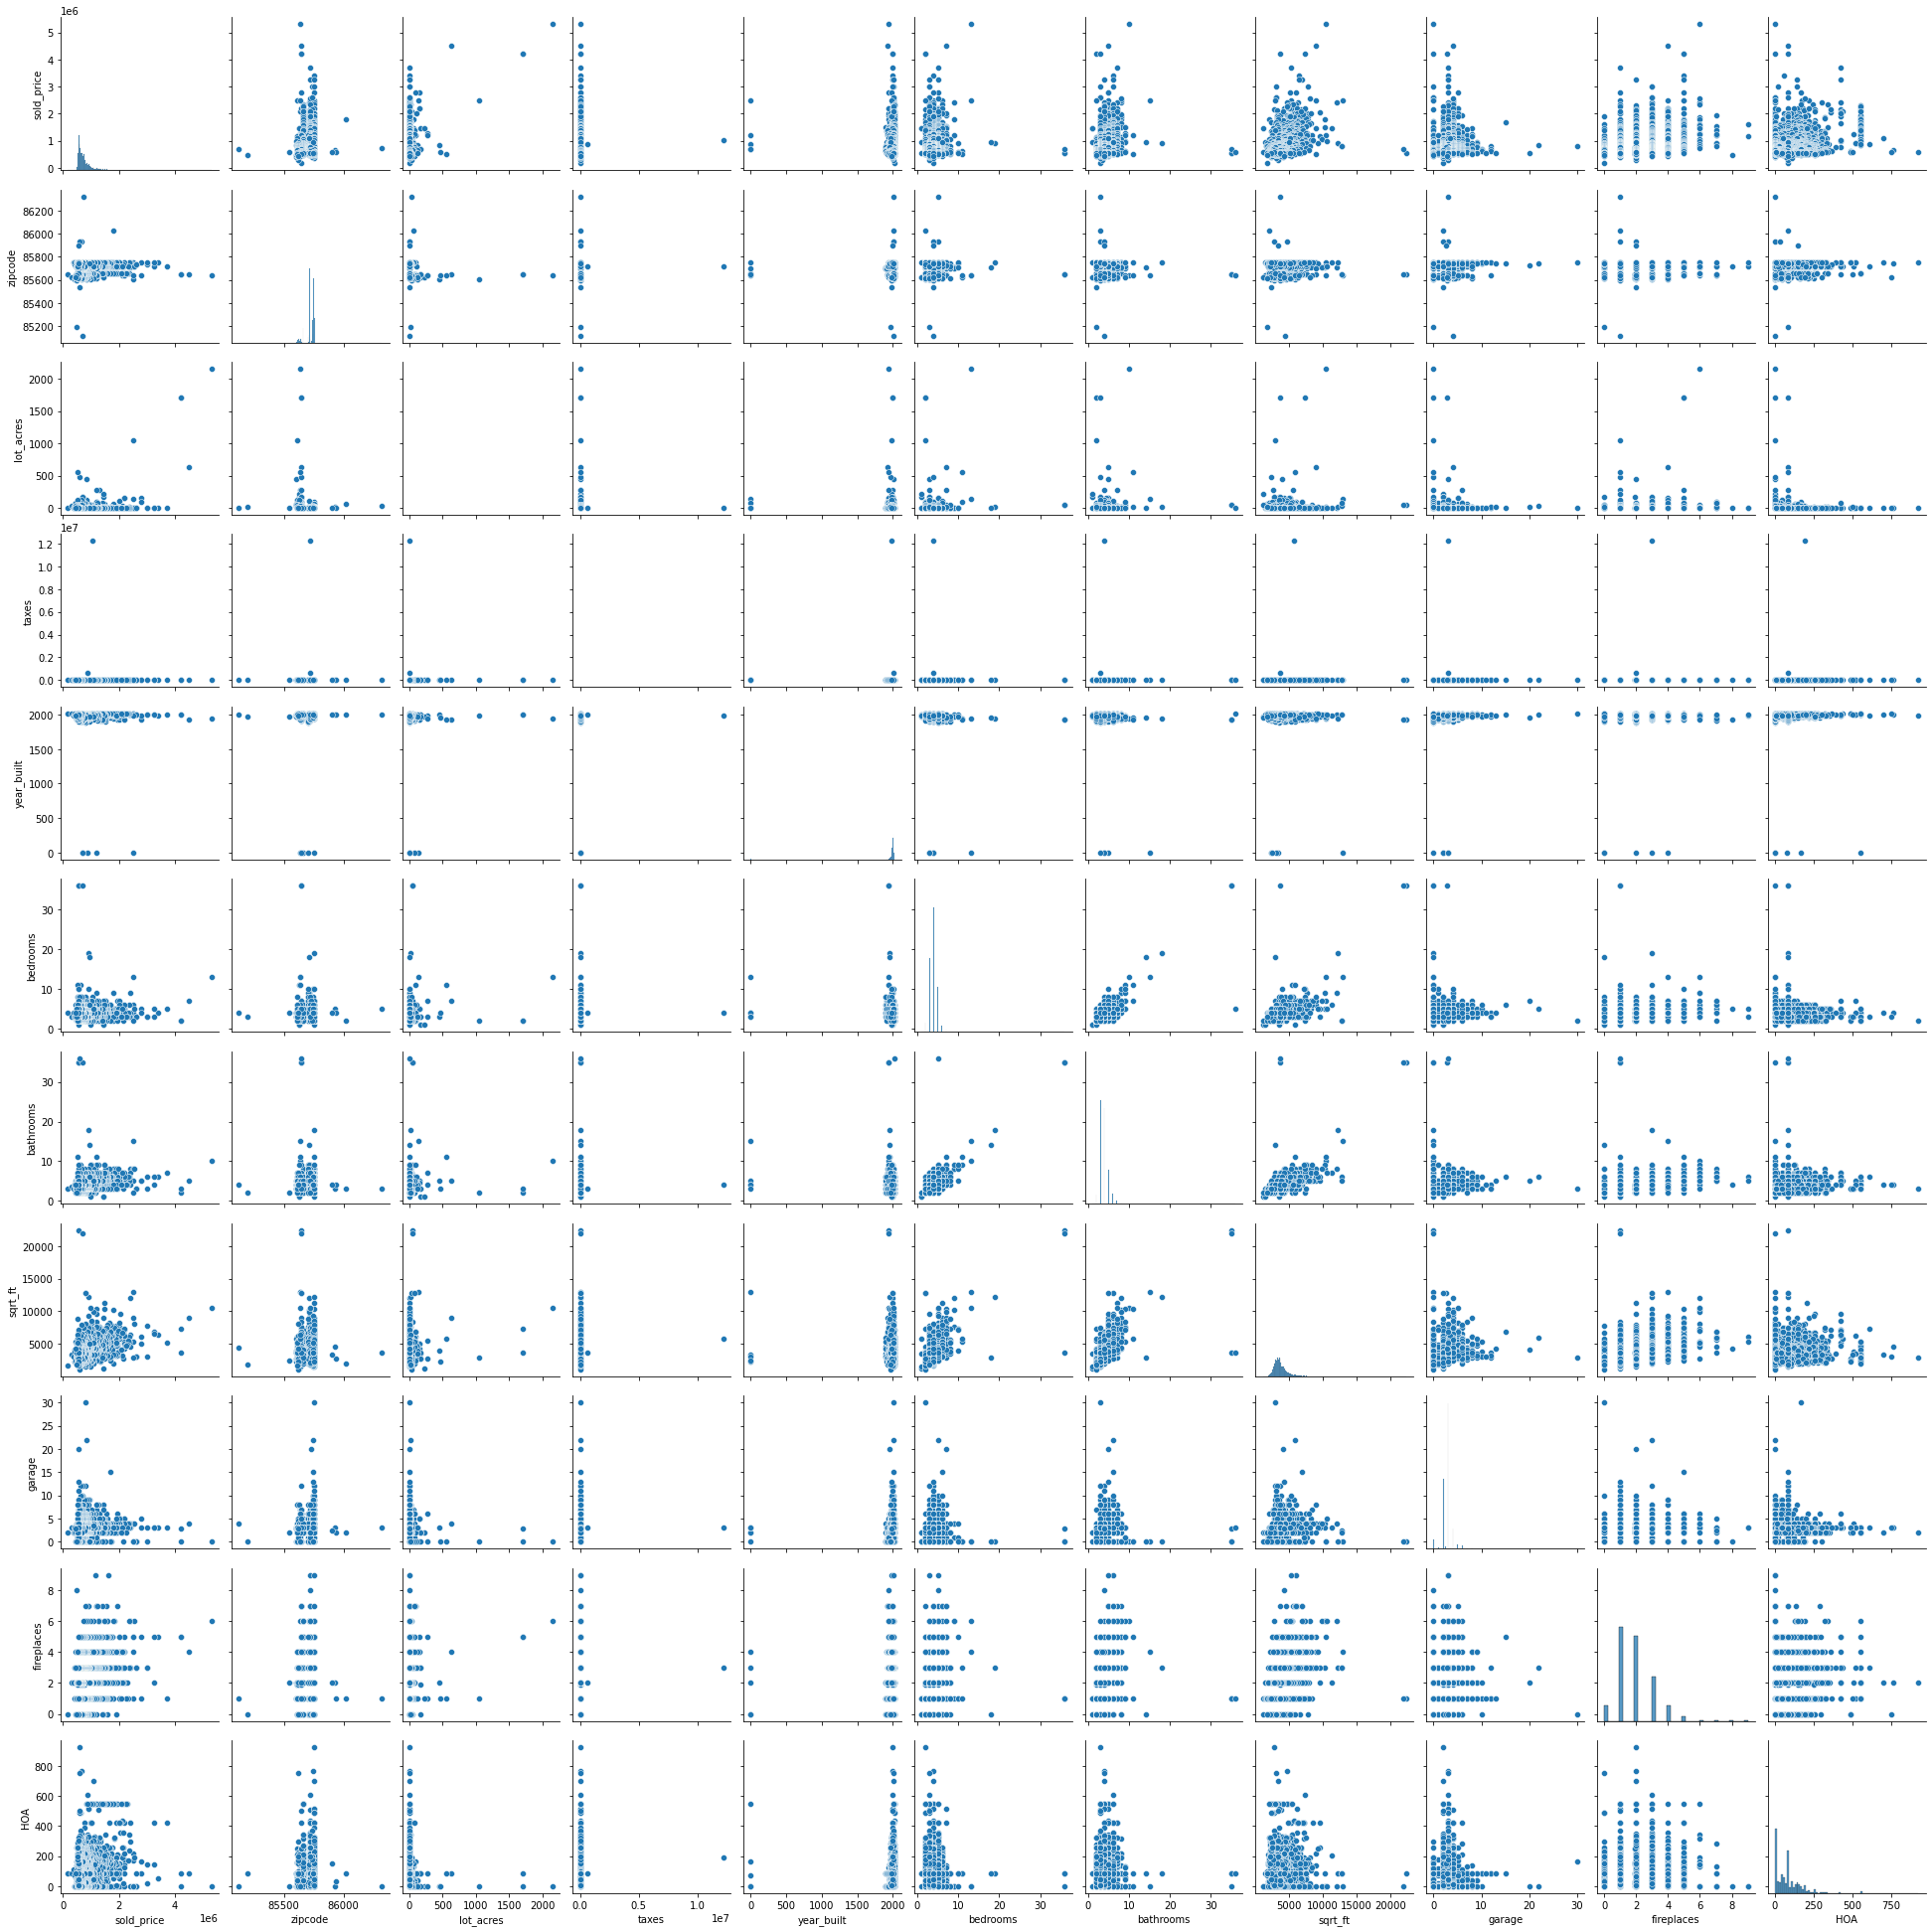

In [53]:
#to view more infor about the data, 
#in order to not do each one, first we see using:
sns.pairplot(data)